# Algorithmic Complexity

Notes by J. S. Oishi

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


## How long will my code take to run?

Today, we will be concerned *solely* with **time complexity**. 

Formally, we want to know $T(d)$, where $d$ is any given dataset and $T(d)$ gives the *total run time*.

## Let's begin with a simple problem. 

How many instructions does the following bit of code take? Go ahead and assume that you can ignore the machinery in the `if` and `for` statements.

In [2]:
def mini(x):
    n = len(x)
    mini = x[0]
    for i in range(n):
        if x[i] < mini:
            mini= x[i]
    return mini

**Go ahead and work it out with your neighbors.**

In [3]:
x = np.random.rand(1000)
x

array([1.60959898e-01, 8.16670495e-01, 9.96775579e-01, 6.50492229e-01,
       9.75202044e-01, 9.11316555e-01, 3.73210648e-01, 7.08962736e-01,
       7.95152351e-01, 7.03015422e-01, 8.28517254e-01, 9.11392907e-01,
       2.90057274e-02, 3.15888507e-01, 4.83419147e-01, 5.59100927e-01,
       8.82334956e-02, 3.31707409e-01, 9.31886048e-01, 2.75375290e-01,
       1.47962723e-01, 3.32751773e-01, 1.43558892e-01, 6.95032178e-01,
       7.84066106e-01, 7.75541926e-01, 4.48773236e-01, 7.18682159e-01,
       6.17781828e-01, 1.34422137e-01, 9.49124956e-02, 2.78553325e-01,
       3.59698066e-01, 2.81998655e-01, 4.95780369e-01, 6.64375005e-01,
       7.58691642e-01, 5.27677655e-01, 5.54181322e-01, 9.01408279e-01,
       8.04121172e-01, 9.19562502e-01, 8.51547118e-01, 7.11745999e-01,
       5.76222426e-01, 6.95203362e-01, 6.69227663e-01, 9.77196695e-01,
       9.05745719e-01, 8.92183565e-01, 2.37965632e-02, 5.21051642e-01,
       3.73852777e-01, 9.82032207e-01, 1.65363083e-01, 2.46358929e-01,
      

In [4]:
print(mini(x))
print(x.min())

0.00022566008766489176
0.00022566008766489176


## The answer

Each time the function is called, we have 

```python
n = len(x)
mini = x[0]
``` 

that's two instructions (again, ignoring how much goes into the `len` call). 

Then, the for loop body requires either one or two instructions. You always have the comparison `x[i] < mini`, but you may or may not have the assignment `mini = x[i]`.


## Exercise
Compute the number  number of instructions for this input data 

```python
x = [4, 3, 2, 1]
```
and 

```python
y = [1, 3, 2, 4]
```

$N_{inst}(x) = 9$

$N_{inst}(y) = 7$

## As usual, pessimism is the most useful view
The answer to "how long does this take" is...it depends on the input. 

Since we would like to know how long an algorithm will take *before* we run it, let's examine the **worst case scenario**.

This allows us to looking for from $T(d)$ to $f(n)$, where $n \equiv \mathrm{size}(d)$ is the *size* of the dataset.

For our simple problem,

$$f(n) = 2 + 4n$$

## Asymptotics

Let's look at a pair of cubic polynomials,

$$ f(n) = f_0 + f_1 n + f_2 n^2 + f_3 n^3 $$
$$ g(n) = g_0 + g_1 n + g_2 n^2 + g_3 n^3 $$

In [5]:
n = np.linspace(0,1000,10000)
f0 = 2; f1 = 1; f2 = 10; f3 = 2
g0 = 0; g1 = 10; g2 = 1; g3 = 1
f = f0 + f1*n + f2*n**2 + f3*n**3
g = g0 + g1*n + g2*n**2 + g3*n**3

<IPython.core.display.Javascript object>


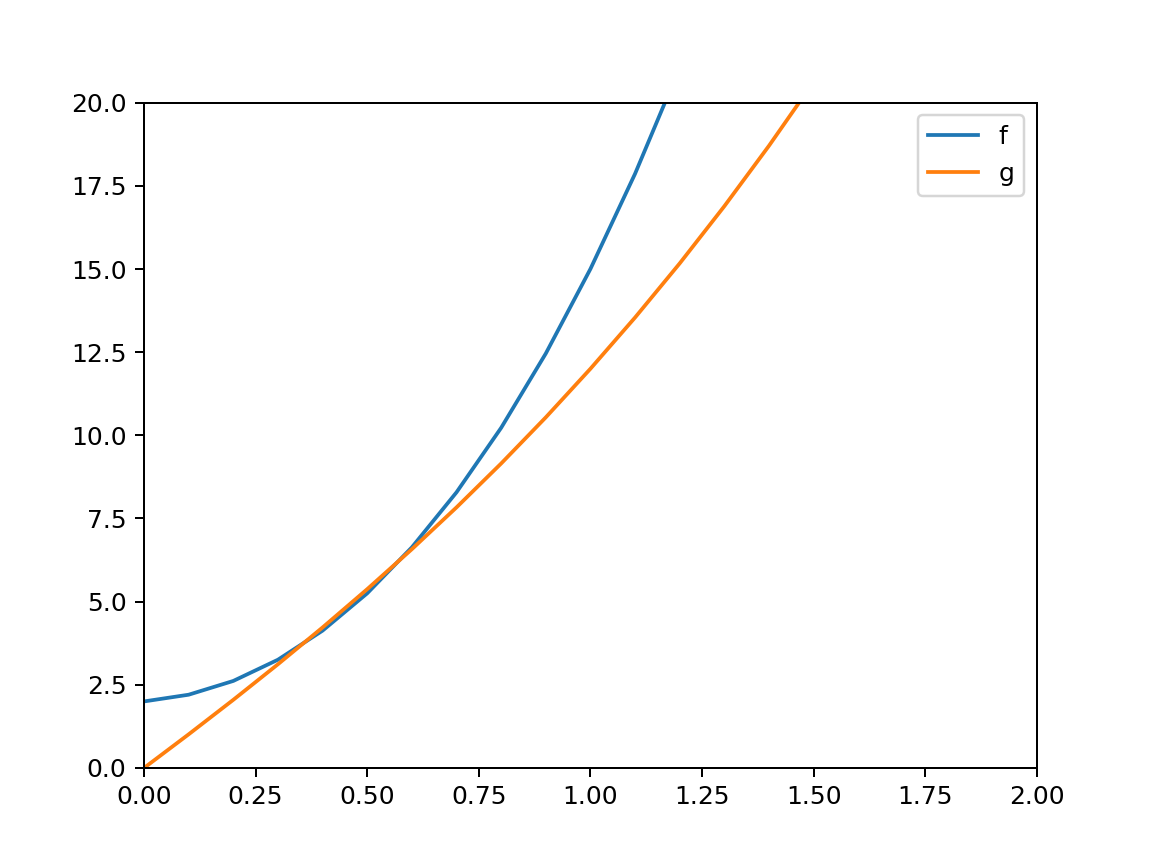

In [6]:
plt.figure()
plt.plot(n, f, label='f')
plt.plot(n, g, label='g')
plt.xlim(0,2)
plt.ylim(0,20)
plt.legend()

Clearly, we can drop the lower order terms *and* the coefficients $f_3$ and $g_3$.

**We call this** 

$$O(n^3)$$, 

and we say our algorithm is "$n^3$", meaning **no worse than $n^3$**.


Of course this is exactly the same notation and meaning as when we do a series expansion in any other calculation,

$$ e^{x} = 1 + x + \frac{x^2}{2} + O(x^3), x\to 0$$.

## An example

Let's take the force calculation for an N-body simulation. We recall we can write this as 

$$\ddot{\mathbf{r}}_i = -G\sum_{i \ne j} \frac{m_j \mathbf{r}_{ij}}{r_{ij}^3},$$

for each particle $i$. This is fairly easy to analyze.

**Calculate the complexity with your neighbors**

## Some Code

This is a very simple implementation of a force calculator that only calculates the $x$ component (for unit masses!).

In [7]:
def f_x(particles):
    G = 1
    a_x = np.empty(len(particles))
    for i, p in enumerate(particles):
        for j, p in enumerate(particles):
            if j != i:
                a_x[i] -= G*p.x/(p.x**2 + p.y**2 + p.z**2)**1.5
#print(type(np.random.rand(3)))                
#f_x([1,1,1])

In [8]:
class Particle:
    def __init__(self, r, v):
        self.r = r
        self.v = v
    @property
    def x(self):
        return self.r[0]
    @property
    def y(self):
        return self.r[1]
        
    @property
    def z(self):
        return self.r[2]

    
particle = Particle((.1,.2,.3),(0,0,0))
#print(particle.r)
p0 = [Particle((.1,.2,.3),(0,0,0)) for i in range(3)]
#print(p0[2].r)
for counter, value in enumerate(p0):
    print(counter, value)
force = f_x(p0)


0 <__main__.Particle object at 0x11c2226a0>
1 <__main__.Particle object at 0x11c2226d8>
2 <__main__.Particle object at 0x11c222748>


## Test it!

Theory is all well and good, but let's do a numerical experiment.

In [9]:
nn = np.array([10, 100, 300, 1000])
nnn = np.linspace(nn[0],nn.max(),10000)
p1 = [Particle(np.random.rand(3),(0,0,0)) for i in range(nn[0])]
p2 = [Particle(np.random.rand(3),(0,0,0)) for i in range(nn[1])]
p3 = [Particle(np.random.rand(3),(0,0,0)) for i in range(nn[2])]
p4 = [Particle(np.random.rand(3),(0,0,0)) for i in range(nn[3])]

In [10]:
t1 = %timeit -o f_x(p1)
t2 = %timeit -o f_x(p2)
t3 = %timeit -o f_x(p3)
t4 = %timeit -o f_x(p4)
times = np.array([t1.average, t2.average, t3.average, t4.average])


199 µs ± 3.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
22 ms ± 680 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
200 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.21 s ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%prun f_x(p4)

In [15]:
import time 

def fast(0):
    pass

SyntaxError: invalid syntax (<ipython-input-15-1a52f7bb2d11>, line 3)

## Plot the results...

<IPython.core.display.Javascript object>


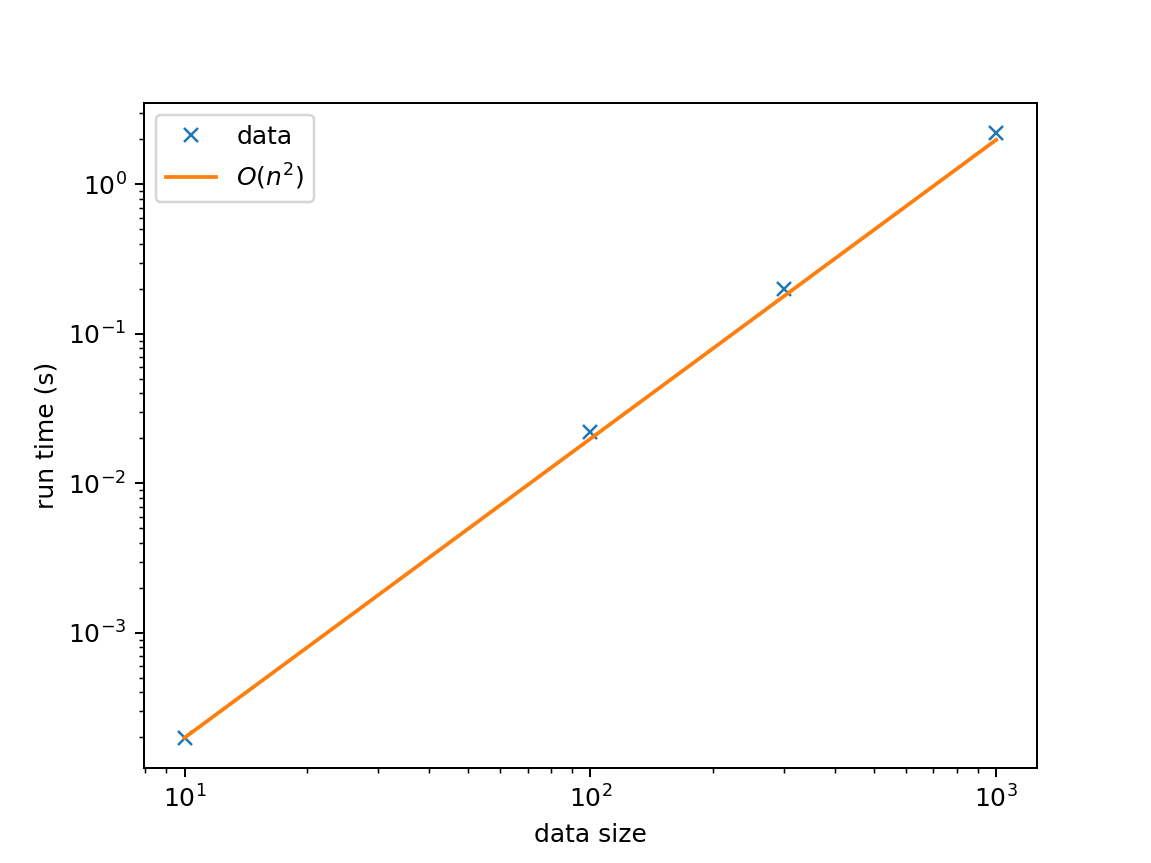

Text(0, 0.5, 'run time (s)')

In [12]:
plt.figure()
plt.loglog(nn,times,'x', label='data')
plt.loglog(nnn,times[0]*(nnn/nnn[0])**2, label=r'$O(n^2)$')
plt.legend();plt.xlabel('data size');plt.ylabel('run time (s)')

## Several Common Asymptotics

<IPython.core.display.Javascript object>


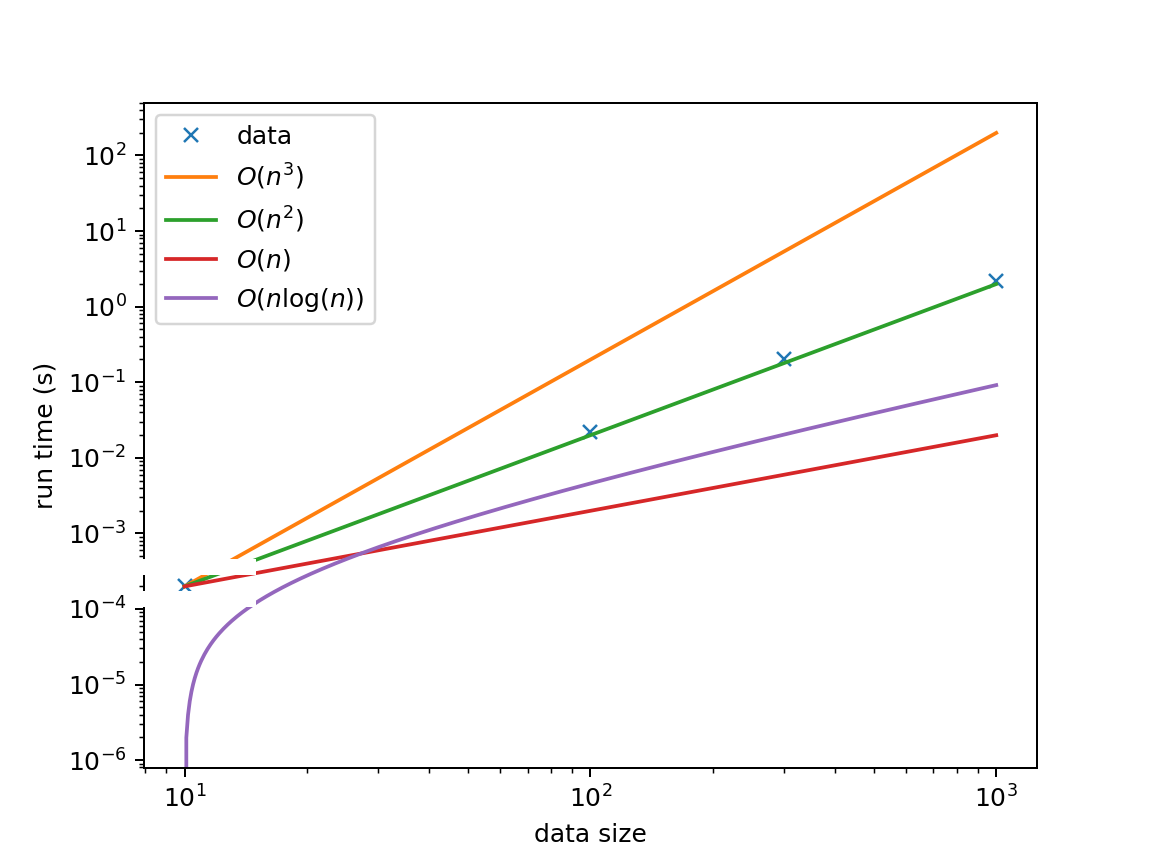

Text(0, 0.5, 'run time (s)')

In [13]:
plt.figure()
plt.loglog(nn,times,'x', label='data')
plt.loglog(nnn,t1.average*(nnn/nnn[0])**3, label=r'$O(n^3)$')
plt.loglog(nnn,times[0]*(nnn/nnn[0])**2, label=r'$O(n^2)$')
plt.loglog(nnn,times[0]*(nnn/nnn[0]), label=r'$O(n)$')
plt.loglog(nnn,t1.average*(nnn/nnn[0])*np.log(nnn/nnn[0]), label=r'$O(n \log(n))$')

plt.legend()
plt.xlabel('data size')
plt.ylabel('run time (s)')

# But...

## Consider the *problem*

Let's talk about solving PDES:

$$\frac{\partial \mathbf{u}}{\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} = -\frac{\nabla p}{\rho} + \nu \nabla^2 \mathbf{u} $$

Let's focus on *two* ways of calculating gradients.

**Finite Difference**
$$\frac{\partial u}{\partial x} \simeq \frac{u_{i+1} - u_{i-1}}{\Delta x}$$

**Spectral**
$$\frac{\partial u}{\partial x} \simeq i k_j \sum_{j = 0}^{N} f_j \exp{i k_j x}$$

## Scaling

<IPython.core.display.Javascript object>


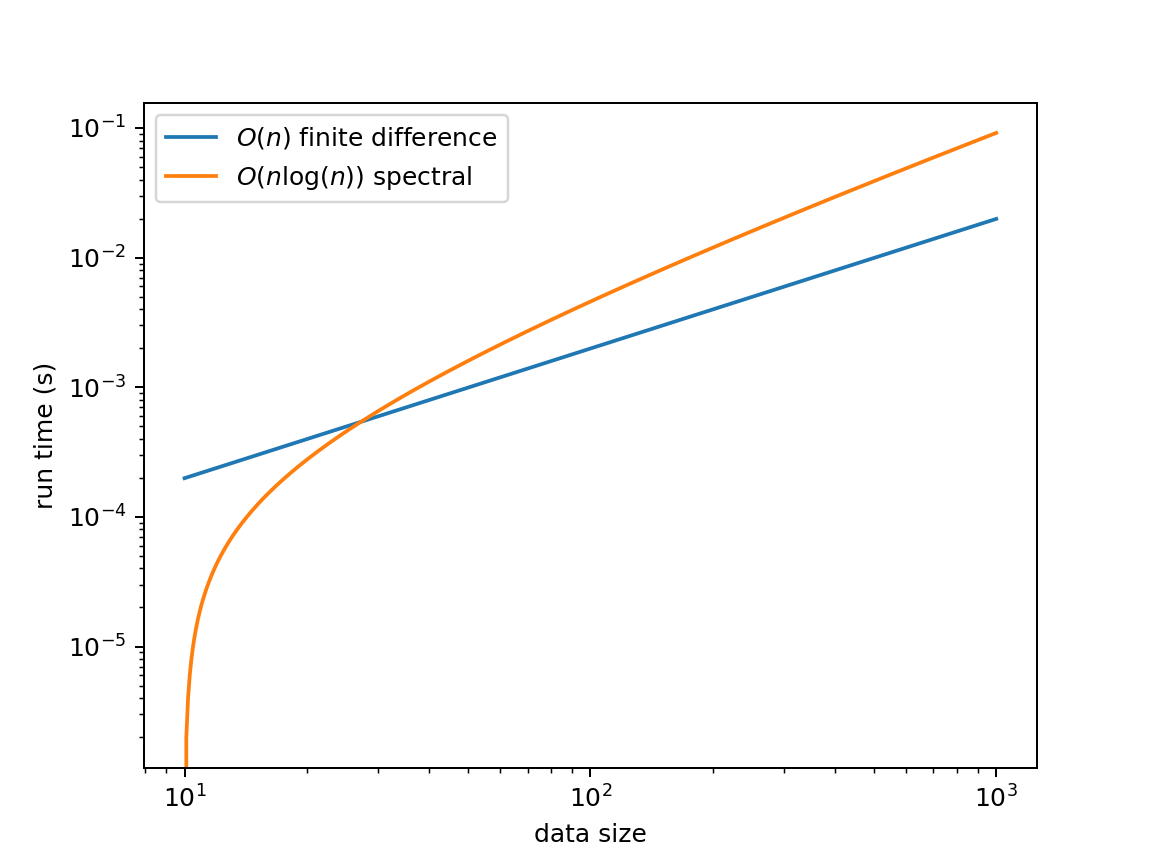

Text(0, 0.5, 'run time (s)')

In [14]:
plt.figure()
plt.loglog(nnn,times[0]*(nnn/nnn[0]), label=r'$O(n)$ finite difference')
plt.loglog(nnn,t1.average*(nnn/nnn[0])*np.log(nnn/nnn[0]), label=r'$O(n \log(n))$ spectral')

plt.legend()
plt.xlabel('data size')
plt.ylabel('run time (s)')

<img src="Screenshot 2019-03-22 at 20.34.57.png">